In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../data/coupons.csv')

In [4]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [17]:
data[data.car.isnull()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [30]:
df = data[["destination","car","Bar","passanger","weather","temperature","time","coupon","Y"]]

In [50]:
df[df.car=="do not drive"]

,destination,car,Bar,passanger,weather,temperature,time,coupon,Y
7305,No Urgent Place,do not drive,gt8,Alone,Sunny,80,10AM,Coffee House,0
7306,No Urgent Place,do not drive,gt8,Friend(s),Sunny,80,10AM,Restaurant(<20),1
7307,No Urgent Place,do not drive,gt8,Alone,Sunny,55,6PM,Coffee House,0
7308,No Urgent Place,do not drive,gt8,Friend(s),Sunny,80,2PM,Restaurant(20-50),1
7309,No Urgent Place,do not drive,gt8,Friend(s),Sunny,80,6PM,Coffee House,0
7310,No Urgent Place,do not drive,gt8,Friend(s),Sunny,55,10AM,Coffee House,0
7311,No Urgent Place,do not drive,gt8,Friend(s),Sunny,55,6PM,Carry out & Take away,1
7312,No Urgent Place,do not drive,gt8,Friend(s),Sunny,30,10PM,Restaurant(<20),0
7313,No Urgent Place,do not drive,gt8,Friend(s),Rainy,55,10PM,Bar,1
7314,No Urgent Place,do not drive,gt8,Friend(s),Snowy,30,10AM,Carry out & Take away,0


In [81]:
bar_coupons = df[df.coupon=="Bar"]

In [51]:
bar_coupons[bar_coupons.Bar.isnull()]

,destination,car,Bar,passanger,weather,temperature,time,coupon,Y
517,No Urgent Place,NaN,NaN,Friend(s),Sunny,80,10AM,Bar,0
854,No Urgent Place,NaN,NaN,Partner,Sunny,80,10AM,Bar,0
857,No Urgent Place,NaN,NaN,Partner,Sunny,80,6PM,Bar,1
1168,No Urgent Place,NaN,NaN,Partner,Sunny,80,10AM,Bar,1
1171,No Urgent Place,NaN,NaN,Partner,Sunny,80,6PM,Bar,1
2380,No Urgent Place,NaN,NaN,Friend(s),Sunny,80,10AM,Bar,1
2868,No Urgent Place,NaN,NaN,Kid(s),Sunny,80,10AM,Bar,0
2881,No Urgent Place,NaN,NaN,Kid(s),Sunny,80,10AM,Bar,0
2885,Home,NaN,NaN,Alone,Sunny,55,6PM,Bar,1
2889,Work,NaN,NaN,Alone,Sunny,55,7AM,Bar,1


<Axes: xlabel='Bar', ylabel='Y'>

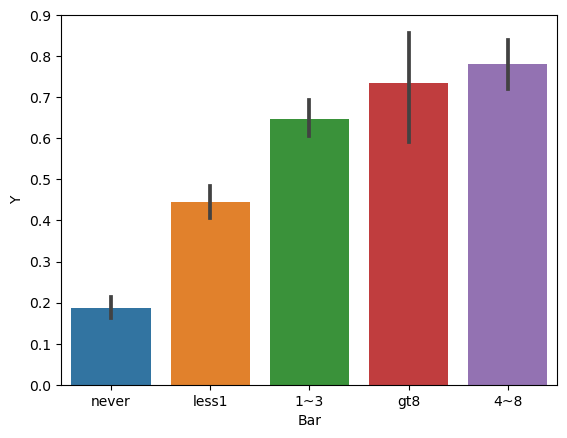

In [84]:
#bar_coupons = bar_coupons.fillna("Unknown")
bar_coupons = bar_coupons[bar_coupons["Bar"].notna()]


In [56]:
bar_coupons

,destination,car,Bar,passanger,weather,temperature,time,coupon,Y
9,No Urgent Place,Unknown,never,Kid(s),Sunny,80,10AM,Bar,0
13,Home,Unknown,never,Alone,Sunny,55,6PM,Bar,1
17,Work,Unknown,never,Alone,Sunny,55,7AM,Bar,0
24,No Urgent Place,Unknown,never,Friend(s),Sunny,80,10AM,Bar,1
35,Home,Unknown,never,Alone,Sunny,55,6PM,Bar,1
...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Unknown,never,Friend(s),Sunny,80,10PM,Bar,0
12664,No Urgent Place,Unknown,never,Friend(s),Sunny,55,10PM,Bar,0
12667,No Urgent Place,Unknown,never,Alone,Rainy,55,10AM,Bar,0
12670,No Urgent Place,Unknown,never,Partner,Rainy,55,6PM,Bar,0


<Axes: xlabel='Bar', ylabel='Y'>

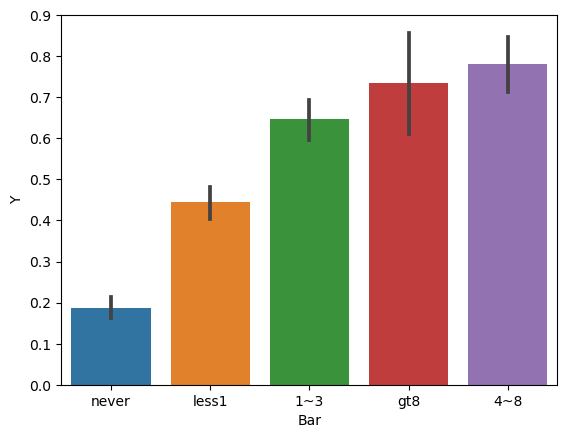

In [85]:
sns.barplot(data=bar_coupons, x='Bar', y='Y')

In [86]:

three_or_less_count = bar_coupons.query('Bar in ["less1", "1~3"]')["Y"].count()
three_or_less_acc_count = bar_coupons.query('Bar in ["less1", "1~3"] and Y==1')["Y"].count()
acc_rate = three_or_less_acc_count/three_or_less_count
acc_rate, three_or_less_count, three_or_less_acc_count

(0.5274043433298863, 967, 510)